In [1]:
%matplotlib inline
from matplotlib import style
style.use('seaborn-whitegrid')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
# Allow us to declare column types
from sqlalchemy import create_engine, func, Column, Integer, String, Float 


In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
data = engine.execute("SELECT * FROM measurement")
for record in data:
    print(record)

.38, 70.0)
(19140, 'USC00516128', '2016-06-16', 0.12, 70.0)
(19141, 'USC00516128', '2016-06-17', 1.27, 69.0)
(19142, 'USC00516128', '2016-06-18', 0.72, 73.0)
(19143, 'USC00516128', '2016-06-19', 0.79, 74.0)
(19144, 'USC00516128', '2016-06-20', 0.52, 72.0)
(19145, 'USC00516128', '2016-06-21', 0.78, 71.0)
(19146, 'USC00516128', '2016-06-22', 0.2, 73.0)
(19147, 'USC00516128', '2016-06-23', 0.9, 72.0)
(19148, 'USC00516128', '2016-06-25', None, 73.0)
(19149, 'USC00516128', '2016-06-26', 0.7, 74.0)
(19150, 'USC00516128', '2016-06-27', 0.3, 72.0)
(19151, 'USC00516128', '2016-06-28', 0.25, 74.0)
(19152, 'USC00516128', '2016-06-29', 0.35, 72.0)
(19153, 'USC00516128', '2016-07-01', None, 74.0)
(19154, 'USC00516128', '2016-07-04', None, 74.0)
(19155, 'USC00516128', '2016-07-05', 0.45, 71.0)
(19156, 'USC00516128', '2016-07-06', 1.46, 71.0)
(19157, 'USC00516128', '2016-07-07', 0.92, 73.0)
(19158, 'USC00516128', '2016-07-08', 0.31, 73.0)
(19159, 'USC00516128', '2016-07-09', 0.15, 71.0)
(19160, 'USC0

In [6]:
# Create our session (link) from Python to the DB
from sqlalchemy.orm import Session
session = Session(bind=engine)

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Find the last date in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [11]:
# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print("Query Date :", query_date)

Query Date : 2016-08-23


In [88]:
data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).all()
for enum,record in enumerate(data,start=1):
    print(record)
print(enum)

, 0.0)
('2016-11-13', 0.0)
('2016-11-14', 0.05)
('2016-11-15', 0.0)
('2016-11-16', 0.18)
('2016-11-17', 0.0)
('2016-11-22', None)
('2016-11-25', None)
('2016-11-26', 0.02)
('2016-11-27', 0.03)
('2016-11-28', 0.0)
('2016-11-29', 0.04)
('2016-11-30', 0.03)
('2016-12-01', 0.07)
('2016-12-02', 0.4)
('2016-12-03', 0.26)
('2016-12-04', 0.0)
('2016-12-05', 0.2)
('2016-12-07', None)
('2016-12-08', 0.02)
('2016-12-09', 0.26)
('2016-12-10', 0.0)
('2016-12-12', None)
('2016-12-13', 0.34)
('2016-12-14', 0.12)
('2016-12-15', 0.07)
('2016-12-16', 0.0)
('2016-12-17', 0.0)
('2016-12-18', 0.04)
('2016-12-19', 0.0)
('2016-12-20', 0.0)
('2016-12-21', 0.09)
('2016-12-22', 0.05)
('2016-12-23', 0.03)
('2016-12-24', 0.13)
('2016-12-26', None)
('2016-12-27', 0.02)
('2016-12-28', 0.01)
('2016-12-29', 0.56)
('2016-12-30', 0.29)
('2016-12-31', 0.36)
('2017-01-01', 0.0)
('2017-01-02', 0.01)
('2017-01-03', 0.0)
('2017-01-04', 0.0)
('2017-01-05', 0.0)
('2017-01-06', 0.59)
('2017-01-07', 0.0)
('2017-01-08', 0.03)
('

In [90]:

# Save the query results as a Pandas DataFrame and set the index to the date column

climate_analysis_df = pd.DataFrame(data, columns = {"date":["date"],
 "prcp":["prcp"]
 })


# Sort the dataframe by date
climate_analysis_df = climate_df.sort_values(["date"])

climate_analysis_df.reset_index(drop=False,inplace=True)
climate_analysis_df.head(100)


,date,prcp
0,2016-08-23,0.00
1,2016-08-23,NaN
2,2016-08-23,1.79
3,2016-08-23,0.05
4,2016-08-23,0.15
...,...,...
95,2016-09-07,0.05
96,2016-09-07,0.11
97,2016-09-07,0.10
98,2016-09-07,1.35


<Figure size 1440x720 with 0 Axes>

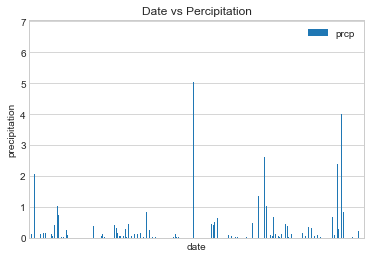

In [83]:


# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(20,10))
climate_analysis_df.plot.bar()
positions = []
plt.xticks(positions)
plt.xlabel("date")
plt.ylabel("precipitation")
plt.title("Date vs Percipitation")
plt.show()



In [51]:
# Use Pandas to calcualte the summary statistics for the precipitation data
statistics = climate_analysis_df["prcp"].describe()
statistics_df = pd.DataFrame(statistics)
statistics_df.rename(columns = {"prcp": "precipitation"})

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [16]:
# Design a query to show how many stations are available in this dataset?
session.query(Station).group_by(Station.station).count()

9

In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.date)).group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [99]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

most_active_stations=session.query(Measurement.station).group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).first()
most_active_sation= most_active_stations[0]
most_active_sation


'USC00519281'

In [100]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station==most_active_sation).all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [112]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_col=session.query(Measurement.tobs).filter(Measurement.station==most_active_sation).\
    filter(Measurement.date>=query_date).all()
temp_df = pd.DataFrame(temp_col, columns=["temp"])
temp_df


,temp
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


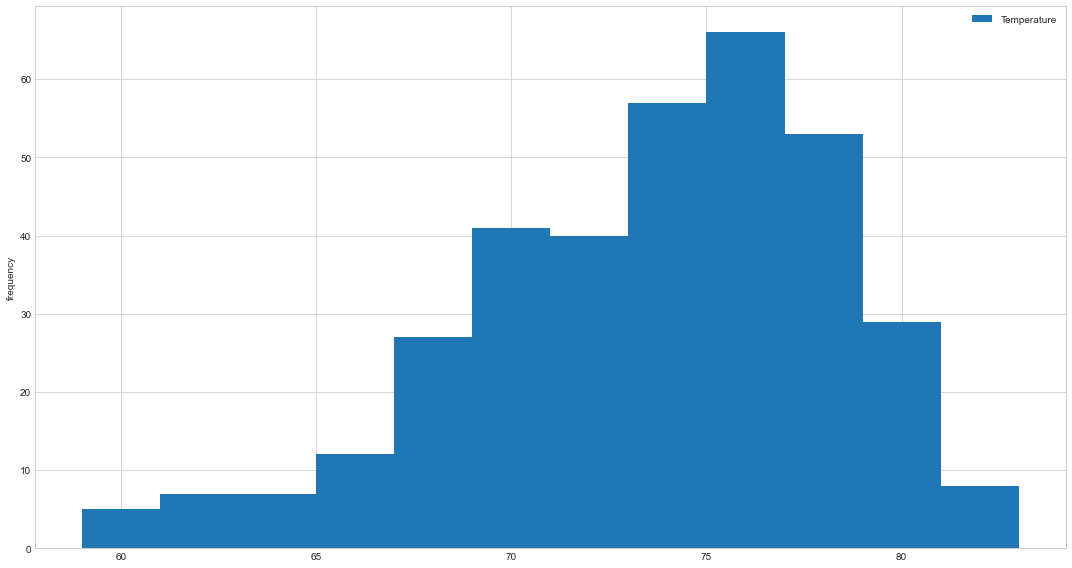

<Figure size 432x288 with 0 Axes>

In [114]:
plt.figure(figsize=(15,8))
plt.hist(temp_df["temp"], bins=10)
plt.ylabel("frequency")
plt.legend(["Temperature"])
plt.tight_layout()
plt.show()

# Save the plot
# plt.tight_layout()
plt.savefig("Images/frequecy.png")
plt.show()

## Bonus Challenge Assignment

In [115]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [23]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
temps = calc_temps('2017-02-28', '2017-03-05')
temps


[(64.0, 72.02777777777777, 78.0)]

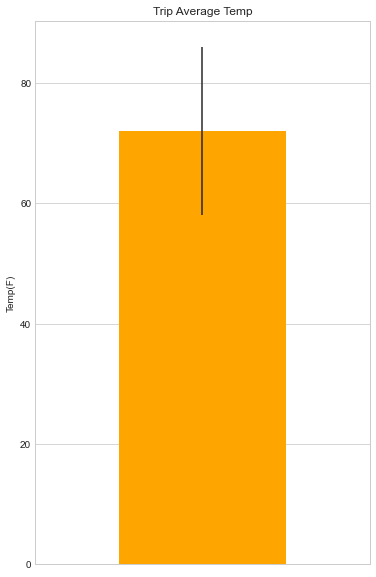

<Figure size 432x288 with 0 Axes>

In [24]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
# create the dataframe
df = pd.DataFrame(temps, columns=["t_min", "t_avg", "t_max"])

# plot the average temp 
plt.figure(figsize=(6,10))
ax=df["t_avg"].plot.bar(yerr=(df["t_max"]-df["t_min"]), color="orange")
plt.title("Trip Average Temp")
plt.ylabel("Temp(F)")
ax.axes.get_xaxis().set_visible(False)
plt.show()

# Save the plot
plt.tight_layout()
plt.savefig("Images/avg_temp.png")
plt.show()


In [25]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

start_date = '2017-02-28'
end_date = '2017-03-05'
sel = [func.count(Measurement.prcp),Measurement.station, Station.name, Station.latitude, Station.longitude,Station.elevation]
rainfall=session.query(*sel).filter(Measurement.station==Station.station).\
    group_by(Measurement.station).\
    filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).\
    order_by(func.count(Measurement.prcp).desc()).all()
for r in rainfall:
    print(r)

(6, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(6, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(6, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)
(6, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(5, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(3, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(2, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)


In [26]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [27]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

from datetime import datetime
# Set the start and end date of the trip
start_date = '2017-02-28'
end_date = '2017-03-05'

# Use the start and end date to create a range of dates
trip_dates = ["2018-02-28", "2018-03-01", "2018-03-02", "2018-03-03", "2018-03-04", "2018-03-05"]

# convert strings to datetime
date_list =[datetime.strptime(date, "%Y-%m-%d") for date in trip_dates]
date_list

# Stip off the year and save a list of %m-%d strings
dates = [date.strftime("%m-%d") for date in date_list]
dates
# Loop through the list of %m-%d strings and calculate the normals for each date

dates = ['02-28', '03-01', '03-02', '03-03', '03-04', '03-05']
normals = [daily_normals(date) for date in dates]
normals


# flatten the normals list
normal_list = [item for sublist in normals for item in sublist]
normal_list


[(65.0, 70.65517241379311, 80.0),
 (64.0, 70.0327868852459, 76.0),
 (61.0, 70.36666666666666, 78.0),
 (60.0, 70.06896551724138, 78.0),
 (57.0, 69.27272727272727, 77.0),
 (60.0, 67.89090909090909, 76.0)]

In [28]:

# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

normals_df = pd.DataFrame(normal_list, columns=["tmin","tavg", "tmax"], index=trip_dates)
normals_df.index.name="date"
normals_df


,tmin,tavg,tmax
date,,,
2018-02-28,65.0,70.655172,80.0
2018-03-01,64.0,70.032787,76.0
2018-03-02,61.0,70.366667,78.0
2018-03-03,60.0,70.068966,78.0
2018-03-04,57.0,69.272727,77.0
2018-03-05,60.0,67.890909,76.0


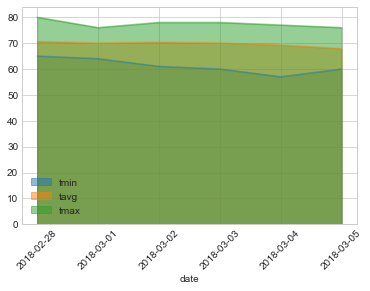

In [29]:

# Plot the daily normals as an area plot with `stacked=False`
normals_df.plot.area(stacked=False)
plt.xticks(rotation=45)
plt.show()